In [1]:
!pip install -q keras

In [2]:
import numpy as np
import pandas as pd
#para representar la matriz de correlación
import seaborn as sns
#para descargar las imagenes
import imageio as io
import cv2
#para representar gráficas
import matplotlib.pyplot as plt

#para preprocesar
from sklearn import preprocessing
#para dividir los datos
from sklearn.model_selection import train_test_split
#para entrar redes
import tensorflow as tf
from tensorflow import keras
#convertir un vector en una matriz binaria
from keras.utils import to_categorical #no lo uso
#para evaluar
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Nos descargamos el dataset de OpenDataSoft
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2023-02-19 07:49:08--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [      <=>           ]  54.31M  3.14MB/s    in 18s     

2023-02-19 07:49:28 (3.03 MB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [4]:
# Leemos el dataset con pandas y mostramos los 5 primeros registros
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,...,10.0,10.0,10.0,NaN,NaN,moderate,2,5.11,"40.40745268477803,-3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,9470166,https://www.airbnb.com/rooms/9470166,20170407214119,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,It belongs to the district center of Madrid wh...,...,9.0,9.0,8.0,NaN,NaN,strict,13,5.88,"40.40831556101927,-3.705006385704201","Host Has Profile Pic,Host Identity Verified,Re..."
2,17444981,https://www.airbnb.com/rooms/17444981,20170407214119,2017-04-08,Cosy Apartment SOL/LA LATINA,Nice apartment near Sol and La Latina. Perfect...,Is a really cosy apartment with the best locat...,Nice apartment near Sol and La Latina. Perfect...,none,"La Latina is well known by El Rastro, the most...",...,10.0,10.0,10.0,NaN,NaN,moderate,1,6.18,"40.413722014584295,-3.7068231186536718","Host Has Profile Pic,Host Identity Verified,Re..."
3,3284565,https://www.airbnb.com/rooms/3284565,20170407214119,2017-04-08,Alquiler Estudio Nuevo Madrid,"Alquilo estudio en el centro de Madrid , total...",NaN,"Alquilo estudio en el centro de Madrid , total...",none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,3,0.19,"40.411263372718054,-3.6973054373712886","Host Has Profile Pic,Host Identity Verified,Is..."
4,499911,https://www.airbnb.com/rooms/499911,20170407214119,2017-04-08,2 bedroom apartment downtown Madrid,NaN,Bright and airy apartment in Central Madrid re...,Bright and airy apartment in Central Madrid re...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,1,1.39,"40.41255625665078,-3.701155364799422","Host Is Superhost,Host Has Profile Pic,Host Id..."


In [5]:
# vamos a ver de cuantos registros disponemos y de cuantas variables
data.shape

(14001, 89)

In [6]:
# ¿De qué variables disponemos?
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Voy a filtrar por Madrid el dataset porque he observado errores en 'City'


In [7]:
#observo si hay filas que no pertenecen a Madrid
print(f'Hay', (data['City'] != 'Madrid').sum(), 'filas que no son de Madrid')

Hay 794 filas que no son de Madrid


In [8]:
#elimino esas filas
data_mad = data.loc[data['City']=='Madrid']
#compruebo que las he eliminado
(data_mad['City'] != 'Madrid').sum()

0

In [9]:
# vamos a ver las medidas del data_mad
data_mad.shape

(13207, 89)

In [10]:
#reseteo los indices para que no haya problemas después al descargar las imagenes
data_mad = data_mad.reset_index()

Cargamos las imágenes del entrenamiento en un array para tenerlas disponibles luego

In [11]:
# montamos GDrive para almacenar las imagenes que descarguemos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
n_images = 1000
images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
urls = data_mad['Thumbnail Url']

i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        # ya tenemos n_images imágenes
        break
    try:
        img = io.imread(url)
        images_aux = cv2.resize(img, (224, 224))
        if images_aux.shape == (224, 224, 3):
          images[i_aux]=images_aux
          good_urls.append(i_img)
          i_aux += 1
          print(f'Imagen {i_img} descargada')
          print(len(good_urls))
        else:
          pass
    except IOError as err:
        pass

Imagen 0 descargada
1
Imagen 1 descargada
2
Imagen 2 descargada
3
Imagen 4 descargada
4
Imagen 7 descargada
5
Imagen 11 descargada
6
Imagen 13 descargada
7
Imagen 15 descargada
8
Imagen 16 descargada
9
Imagen 17 descargada
10
Imagen 21 descargada
11
Imagen 23 descargada
12
Imagen 24 descargada
13
Imagen 25 descargada
14
Imagen 26 descargada
15
Imagen 27 descargada
16
Imagen 29 descargada
17
Imagen 30 descargada
18
Imagen 31 descargada
19
Imagen 32 descargada
20
Imagen 34 descargada
21
Imagen 35 descargada
22
Imagen 36 descargada
23
Imagen 37 descargada
24
Imagen 38 descargada
25
Imagen 39 descargada
26
Imagen 40 descargada
27
Imagen 41 descargada
28
Imagen 43 descargada
29
Imagen 45 descargada
30
Imagen 46 descargada
31
Imagen 47 descargada
32
Imagen 48 descargada
33
Imagen 52 descargada
34
Imagen 54 descargada
35
Imagen 55 descargada
36
Imagen 56 descargada
37
Imagen 57 descargada
38
Imagen 58 descargada
39
Imagen 59 descargada
40
Imagen 60 descargada
41
Imagen 61 descargada
42
Imagen

In [13]:
# Visualizamos las imágenes cargadas
print(images.shape)

(1000, 224, 224, 3)


In [14]:
# Mantenemos los datos numéricos solo para aquellos pisos que tienen imágenes 
# y las hemos obtenido
final_data = data_mad.iloc[good_urls, :]

In [15]:
print(final_data.shape)

(1000, 90)


In [16]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images.npy', images)
np.save('final_data.npy', final_data)
np.save('good_url.npy', good_urls)

In [17]:
# almacenamos las imagenes en nuestro drive
!cp images.npy /content/drive/MyDrive/DL/images.npy
!cp final_data.npy /content/drive/MyDrive/DL/final_data.npy
!cp good_url.npy /content/drive/MyDrive/DL/good_url.npy


In [18]:
!ls -lah images.npy final_data.npy good_url.npy

-rw-r--r-- 1 root root 3.8M Feb 19 07:55 final_data.npy
-rw-r--r-- 1 root root 8.0K Feb 19 07:55 good_url.npy
-rw-r--r-- 1 root root 144M Feb 19 07:55 images.npy


In [19]:
#Elimino del dataset la variable de las urls porque ya no la necesito

final_data = final_data.drop(['Thumbnail Url'], axis=1)
final_data.head(3)

,index,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,0,15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,...,10.0,10.0,10.0,NaN,NaN,moderate,2,5.11,"40.40745268477803,-3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,1,9470166,https://www.airbnb.com/rooms/9470166,20170407214119,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,...,9.0,9.0,8.0,NaN,NaN,strict,13,5.88,"40.40831556101927,-3.705006385704201","Host Has Profile Pic,Host Identity Verified,Re..."
2,2,17444981,https://www.airbnb.com/rooms/17444981,20170407214119,2017-04-08,Cosy Apartment SOL/LA LATINA,Nice apartment near Sol and La Latina. Perfect...,Is a really cosy apartment with the best locat...,Nice apartment near Sol and La Latina. Perfect...,none,...,10.0,10.0,10.0,NaN,NaN,moderate,1,6.18,"40.413722014584295,-3.7068231186536718","Host Has Profile Pic,Host Identity Verified,Re..."


### División de los datos

In [20]:
#Divido entre train y test
train, test = train_test_split(final_data, test_size=0.2, shuffle=True, random_state=42)
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

#guardo los CSV en local
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (800, 89)
Dimensiones del dataset de test: (200, 89)


In [21]:
#compruebo que tengo los indices originales
train.head()

,index,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
45,45,16818439,https://www.airbnb.com/rooms/16818439,20170407214119,2017-04-08,Appartment Centro Madrid,Center,NaN,Center,none,...,NaN,NaN,NaN,NaN,NaN,strict,1,0.56,"40.417820222494925,-3.7197982296625356","Host Has Profile Pic,Requires License"
803,843,14711445,https://www.airbnb.com/rooms/14711445,20170407214119,2017-04-08,"Charming Room, Centre of Madrid","Lugares de interés: Museo Nacional del Prado, ...","Big and comfortable room, near by the best tou...","Lugares de interés: Museo Nacional del Prado, ...",none,...,10.0,10.0,9.0,NaN,NaN,strict,3,4.29,"40.41537091965121,-3.6974099346246363","Host Has Profile Pic,Host Identity Verified,Re..."
1051,1118,16388332,https://www.airbnb.com/rooms/16388332,20170407214119,2017-04-08,Amazing Penthouse in a Great Neighborhood,Bask in Madrid's sun in our two gorgeous terra...,NaN,Bask in Madrid's sun in our two gorgeous terra...,none,...,10.0,10.0,10.0,NaN,NaN,moderate,18,0.31,"40.426538201874706,-3.6713627840651943","Host Has Profile Pic,Host Identity Verified,Is..."
830,871,11820688,https://www.airbnb.com/rooms/11820688,20170407214119,2017-04-08,Calm near the center,Nice apartment well comunicated: 10 min to dow...,"The room and the flat are not big, but are cosy.",Nice apartment well comunicated: 10 min to dow...,none,...,10.0,9.0,9.0,NaN,NaN,moderate,1,0.61,"40.4028612390113,-3.7499600283261527","Host Has Profile Pic,Host Identity Verified,Is..."
1276,1344,17621531,https://www.airbnb.com/rooms/17621531,20170407214119,2017-04-08,PALACIO REAL-PLAZA DE ESPAÑA location-GRAN VIA 16,"Lugares de interés: Templo de Debod, Palacio R...",Precioso apartamento en la planta 8 de edifici...,"Lugares de interés: Templo de Debod, Palacio R...",none,...,NaN,NaN,NaN,NaN,NaN,flexible,2,NaN,"40.42596399752665,-3.713259035873454","Host Has Profile Pic,Requires License"


In [22]:
test.head()

,index,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
771,811,11155461,https://www.airbnb.com/rooms/11155461,20170407214119,2017-04-08,Piso 2 hab. Centro de Madrid,Piso en el Centro de Madrid en el corazón cult...,Tiene estas características: un baño amplio co...,Piso en el Centro de Madrid en el corazón cult...,none,...,9.0,9.0,9.0,NaN,NaN,flexible,1,3.14,"40.41386287795414,-3.700469503865315","Host Has Profile Pic,Is Location Exact,Require..."
1120,1187,15551352,https://www.airbnb.com/rooms/15551352,20170407214119,2017-04-08,Céntrico y acogedor apartamento en pleno MADRID,"Lugares de interés: Puerta del sol, CaixaForum...",El apartamento esta recién reformado en su tot...,"Lugares de interés: Puerta del sol, CaixaForum...",none,...,9.0,10.0,10.0,NaN,NaN,flexible,10,3.23,"40.41096128119897,-3.7036648030985697","Host Has Profile Pic,Host Identity Verified,Is..."
1124,1191,754678,https://www.airbnb.com/rooms/754678,20170407214119,2017-04-08,APARTMENT IN THE CENTRE OF MADRID.,"Great Floor located in the Center of Madrid, i...","Apartment exterior, very luminous, wide and co...","Great Floor located in the Center of Madrid, i...",none,...,10.0,10.0,9.0,NaN,NaN,strict,1,2.57,"40.41232637471543,-3.6964883599173968","Host Has Profile Pic,Is Location Exact,Require..."
1006,1073,7017678,https://www.airbnb.com/rooms/7017678,20170407214119,2017-04-08,Apartamento Centro Madrid,Bonito loft en el centro de Madrid. Junto al p...,Bonito loft en el centro de Madrid.,Bonito loft en el centro de Madrid. Junto al p...,none,...,10.0,10.0,9.0,NaN,NaN,moderate,1,3.50,"40.40708262477703,-3.694274471141013","Host Has Profile Pic,Host Identity Verified,Is..."
621,654,7140544,https://www.airbnb.com/rooms/7140544,20170407214119,2017-04-08,Habitación amplia y confortable,"Habitación grande, con cama de 1,50m, baño pri...",NaN,"Habitación grande, con cama de 1,50m, baño pri...",none,...,10.0,10.0,10.0,NaN,NaN,strict,2,0.61,"40.46982000841591,-3.638650716794969","Host Has Profile Pic,Host Identity Verified,Is..."


### Cargamos los datos de train 

In [23]:
#cargo los datos de train para trabajar con ellos
#df_train = pd.read_csv('./train.csv', sep=';', decimal='.') #OJO! si cargo el csv me cambia los indices porque lee de nuevo y hace un df del csv
df_train = train
df_train.shape

(800, 89)

### Análisis exploratorio de train

In [24]:
#eliminar variables irrelevantes para el modelo, las 4 últimas son fruto de una regularización anterior por lasso
df_train = df_train.drop(['Neighbourhood','City','Zipcode','ID','Listing Url','Scrape ID','Last Scraped',
                                  'Name', 'Summary','Space','Description','Experiences Offered','Neighborhood Overview',
                                  'Notes','Amenities','Square Feet','Transit','Access' ,'Interaction', 'House Rules' ,
                                  'Medium Url','Picture Url','XL Picture Url','Host ID', 'Host URL', 
                                  'Host Name', 'Host Since', 'Host Location', 'Host About','Host Response Time',
                                  'Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url', 
                                  'Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications',
                                  'Street','Neighbourhood Group Cleansed','State','Market','Smart Location','Country Code',
                                  'Country','Latitude','Longitude', 'Security Deposit','Cleaning Fee',
                                  'Minimum Nights','Maximum Nights','Calendar Updated','Has Availability','Availability 30',
                                  'Availability 60','Availability 90','Availability 365','Calendar last Scraped', 
                                  'First Review','Last Review','Review Scores Accuracy','Review Scores Cleanliness',
                                  'Review Scores Checkin','Weekly Price', 'Monthly Price','Review Scores Communication',
                                  'Review Scores Location','Review Scores Value','License','Jurisdiction Names',
                                  'Calculated host listings count','Reviews per Month','Geolocation','Features','Guests Included', 
                                  'Cancellation Policy','Bed Type','Property Type' ], axis=1)
df_train.columns

Index(['index', 'Neighbourhood Cleansed', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Extra People',
       'Number of Reviews', 'Review Scores Rating'],
      dtype='object')

In [25]:
#renombro las columnas
df_train.columns=['index','Neighbourhood_Cleansed', 'Room_Type','Accommodates',
                  'Bathrooms', 'Bedrooms', 'Beds','Price','Extra_People',
                      'Number_of_Reviews', 'Review_Scores_Rating']

In [26]:
#búsqueda de valores nulos
df_train.isnull().any()

index                     False
Neighbourhood_Cleansed    False
Room_Type                 False
Accommodates              False
Bathrooms                  True
Bedrooms                   True
Beds                       True
Price                     False
Extra_People              False
Number_of_Reviews         False
Review_Scores_Rating       True
dtype: bool

In [27]:
#contabilizo los valores nulos
print(f'Bathrooms tiene: ', df_train['Bathrooms'].isnull().sum())
print(f'Bedrooms tiene: ', df_train['Bedrooms'].isnull().sum())
print(f'Beds tiene: ', df_train['Beds'].isnull().sum())
print(f'Review_Scores_Rating tiene: ', df_train['Review_Scores_Rating'].isnull().sum())

Bathrooms tiene:  2
Bedrooms tiene:  2
Beds tiene:  3
Review_Scores_Rating tiene:  154


In [28]:
#Imputación de valores nulos por la moda
df_train["Bathrooms"].fillna(df_train["Bathrooms"].mode()[0], inplace=True)
df_train["Bedrooms"].fillna(df_train["Bedrooms"].mode()[0], inplace=True)
df_train["Beds"].fillna(df_train["Beds"].mode()[0], inplace=True)
df_train["Review_Scores_Rating"].fillna(df_train["Review_Scores_Rating"].mode()[0], inplace=True) 
#compruebo
print(f'Bathrooms tiene: ', df_train['Bathrooms'].isnull().sum())
print(f'Bedrooms tiene: ', df_train['Bedrooms'].isnull().sum())
print(f'Beds tiene: ', df_train['Beds'].isnull().sum())
print(f'Review_Scores_Rating tiene: ', df_train['Review_Scores_Rating'].isnull().sum())

Bathrooms tiene:  0
Bedrooms tiene:  0
Beds tiene:  0
Review_Scores_Rating tiene:  0


In [29]:
#codificación de variables categóricas
df_train.dtypes

index                       int64
Neighbourhood_Cleansed     object
Room_Type                  object
Accommodates                int64
Bathrooms                 float64
Bedrooms                  float64
Beds                      float64
Price                     float64
Extra_People                int64
Number_of_Reviews           int64
Review_Scores_Rating      float64
dtype: object

In [30]:
#utilizo MeanEncoder para imputar con la media de la variable objetivo, menos las imagenes
categorical = ['Neighbourhood_Cleansed', 'Room_Type']

mean_map = {}
for c in categorical:
    mean = df_train.groupby(c)['Price'].mean()
    df_train[c] = df_train[c].map(mean)    
    mean_map[c] = mean
df_train.dtypes

index                       int64
Neighbourhood_Cleansed    float64
Room_Type                 float64
Accommodates                int64
Bathrooms                 float64
Bedrooms                  float64
Beds                      float64
Price                     float64
Extra_People                int64
Number_of_Reviews           int64
Review_Scores_Rating      float64
dtype: object

In [31]:
df_train

,index,Neighbourhood_Cleansed,Room_Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Extra_People,Number_of_Reviews,Review_Scores_Rating
45,45,78.234375,87.695067,3,1.0,1.0,2.0,80.0,0,1,100.0
803,843,88.303030,34.769912,2,2.0,1.0,1.0,25.0,0,31,91.0
1051,1118,81.636364,87.695067,4,2.0,2.0,3.0,100.0,30,1,100.0
830,871,33.400000,34.769912,2,1.0,1.0,1.0,16.0,8,6,85.0
1276,1344,86.444444,87.695067,6,1.0,1.0,1.0,75.0,10,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
170,172,71.636364,87.695067,4,1.0,2.0,3.0,95.0,0,50,99.0
416,429,31.500000,87.695067,6,1.0,3.0,4.0,46.0,13,18,93.0
1308,1379,33.500000,34.769912,2,1.0,1.0,1.0,50.0,0,0,100.0
652,692,78.984127,87.695067,3,1.0,1.0,2.0,55.0,18,45,89.0


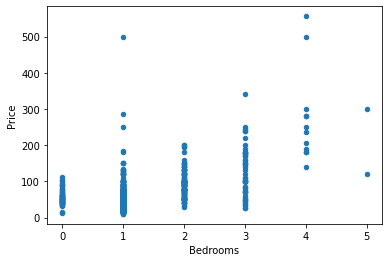

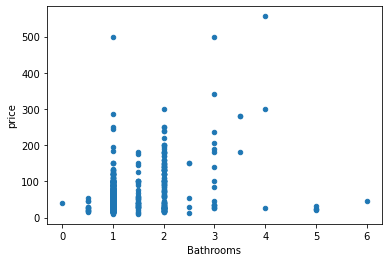

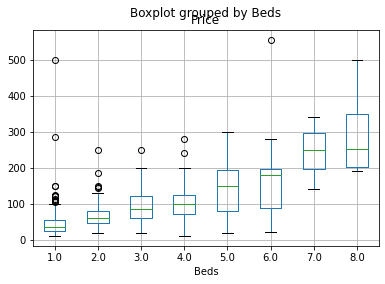

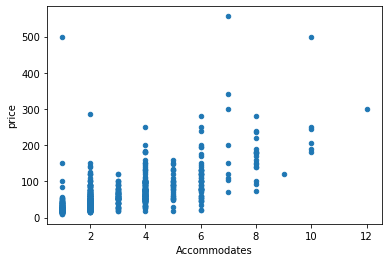

In [32]:
#Observación y limpieza de outlaiers

#scatter Bedrooms x Price
df_train.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

#boxplot Bathrooms x Price
df_train.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('price')
plt.show()

#boxplot Beds x Price
df_train.boxplot(by='Beds',column = 'Price')
plt.show()

#boxplot Accommodates x Price
df_train.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('price')
plt.show()


In [33]:
#aplico filtros para reducir outliers
df_train_filter = df_train[(df_train['Bedrooms'] > 0) & (df_train['Bedrooms'] < 7)]
df_train_filter2 = df_train_filter[(df_train_filter['Bathrooms'] > 0) & (df_train_filter['Bathrooms'] < 4.5)]

df_train_filter4 = df_train_filter2[(df_train_filter2['Accommodates'] > 1) & (df_train_filter2['Accommodates'] < 11)]

In [34]:
#análisis de correlación 
df_train_filter4.corr().T

,index,Neighbourhood_Cleansed,Room_Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Extra_People,Number_of_Reviews,Review_Scores_Rating
index,1.000000,0.006938,-0.118366,-0.000250,0.022645,0.019665,0.018537,-0.023212,-0.004172,-0.064025,-0.045372
Neighbourhood_Cleansed,0.006938,1.000000,0.250127,0.310646,0.348975,0.294262,0.297122,0.526814,0.057937,0.001182,0.055327
Room_Type,-0.118366,0.250127,1.000000,0.542198,0.108249,0.414292,0.402520,0.482468,0.056190,0.125881,0.028040
Accommodates,-0.000250,0.310646,0.542198,1.000000,0.477129,0.751922,0.849960,0.651680,0.254411,0.059584,0.042469
Bathrooms,0.022645,0.348975,0.108249,0.477129,1.000000,0.581317,0.491385,0.545124,0.074652,-0.056632,0.063598
Bedrooms,0.019665,0.294262,0.414292,0.751922,0.581317,1.000000,0.751045,0.641292,0.089700,-0.044661,0.076252
Beds,0.018537,0.297122,0.402520,0.849960,0.491385,0.751045,1.000000,0.614853,0.206432,0.002198,0.011006
Price,-0.023212,0.526814,0.482468,0.651680,0.545124,0.641292,0.614853,1.000000,0.072608,-0.044186,0.144216
Extra_People,-0.004172,0.057937,0.056190,0.254411,0.074652,0.089700,0.206432,0.072608,1.000000,0.103397,-0.031158
Number_of_Reviews,-0.064025,0.001182,0.125881,0.059584,-0.056632,-0.044661,0.002198,-0.044186,0.103397,1.000000,-0.037915


In [35]:
df_train_filter4.index

Int64Index([  45,  803, 1051,  830, 1276,  894,  260, 1409,  737,  110,
            ...
             192,  922,   34, 1057,  117,  170,  416, 1308,  652,  166],
           dtype='int64', length=622)

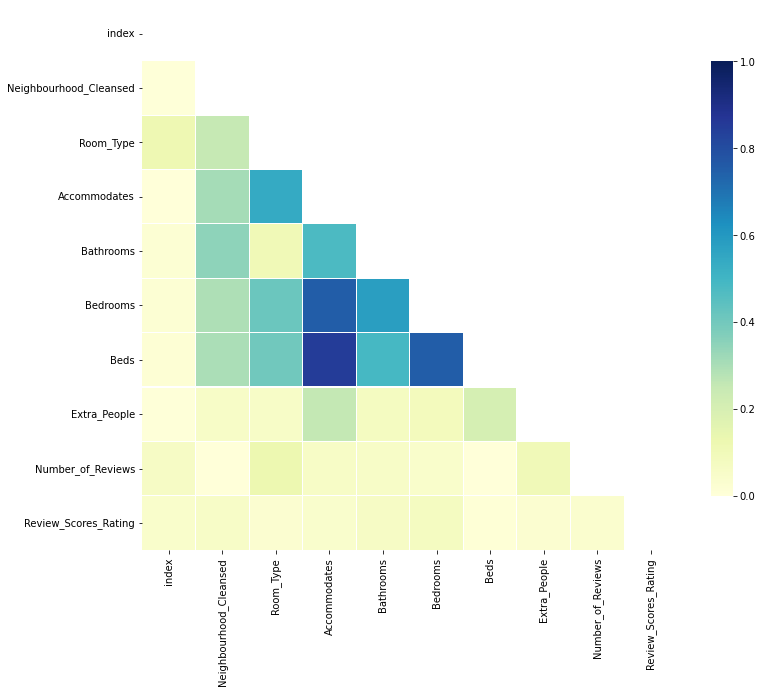

In [36]:
# Compute the correlation matrix
corr = np.abs(df_train_filter4.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [37]:
#elimino Beds por colinealidad con accommodates
df_training= df_train_filter4.drop(['Beds'],axis=1)

In [38]:
#veo las variables que me quedan
df_training.columns

Index(['index', 'Neighbourhood_Cleansed', 'Room_Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Price', 'Extra_People', 'Number_of_Reviews',
       'Review_Scores_Rating'],
      dtype='object')

In [39]:
#las nuevas medidas del df
df_training.shape

(622, 10)

In [40]:
df_training.fillna(0, inplace=True) #reemplazo los valores nulos a 0 por si los hubiera.

In [41]:
df_training.isnull().values.any() #me aseguro de que no hay valores nulos

False

### División de los datos de entrenamiento, la etiqueta y 'Price' por un lado, el resto por otro.

In [42]:
#Divido en X e y los datos del df
X_train =df_training.drop(['Price'], axis=1) # me defino un df sin la variable objetivo

# Obtener las etiquetas de regresion y_reg que la voy a llamar y_train
Y_train = df_training['Price'] #esta es mi variable objetivo

print('Filas, columnas', X_train.shape)
print('Filas, columnas', Y_train.shape)

Filas, columnas (622, 9)
Filas, columnas (622,)


## Cargo las imagenes de train para después

In [43]:
#Busco las imagenes de los train para el modelo CNN
images = np.load('./images.npy')
good_url = np.load('./good_url.npy')
indices_train= X_train.index #obtengo los indices de mi conjunto de entrenamiento

#me paso good_url a array #(podía haber lo hecho con good_urls que ya era una lista)
index_ = [] 
for elemento in good_url:
    index_.append(elemento)

#voy a buscar los indices de las imagenes que tengo en mi X_train
images_train_index= []

for elemento in indices_train:
   images_train_index.append(elemento)

#comparo los indices de train con good_url y asocio las imagenes 
imagenes_train=[]

for elemento in indices_train:
  for posicion, indice in enumerate(index_):
      if elemento == indice:
          imagenes_train.append(images[posicion])



In [44]:
indices_not_in_index_= []
def conjuntos(X_train,index):
  for a in X_train.index:
    if a not in index_:
      indices_not_in_index_.append(a)
      return False
  a +=1
  return True
conjuntos(X_train,index_)

True

In [45]:
len(imagenes_train)

622

In [46]:
imagenes_train

[array([[[252, 255, 250],
         [252, 255, 248],
         [249, 252, 243],
         ...,
         [167, 152, 109],
         [166, 151, 108],
         [165, 150, 107]],
 
        [[252, 255, 249],
         [253, 255, 248],
         [250, 253, 243],
         ...,
         [167, 152, 109],
         [165, 150, 107],
         [165, 150, 107]],
 
        [[252, 255, 248],
         [254, 255, 248],
         [250, 253, 243],
         ...,
         [166, 152, 109],
         [165, 150, 107],
         [165, 150, 107]],
 
        ...,
 
        [[223, 219, 216],
         [222, 218, 215],
         [219, 216, 212],
         ...,
         [145, 131, 104],
         [144, 130, 103],
         [144, 130, 103]],
 
        [[222, 218, 215],
         [221, 218, 214],
         [219, 216, 211],
         ...,
         [144, 130, 103],
         [144, 130, 103],
         [144, 130, 103]],
 
        [[222, 218, 215],
         [221, 217, 214],
         [218, 215, 210],
         ...,
         [144, 130, 103],
  

### Preparo y normalizo los datos de train

In [47]:
from sklearn.preprocessing import MinMaxScaler
#Normalizo las etiquetas con el máximo
Y_train_norm = Y_train /Y_train.max() 

#normalizo el resto de los datos con StandarScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_norm = scaler.fit_transform(X_train)


In [48]:
Y_train_norm

45      0.143885
803     0.044964
1051    0.179856
830     0.028777
1276    0.134892
          ...   
170     0.170863
416     0.082734
1308    0.089928
652     0.098921
166     0.053957
Name: Price, Length: 622, dtype: float64

In [49]:
X_train_norm

array([[0.02721088, 0.22397837, 1.        , ..., 0.        , 0.00350877,
        1.        ],
       [0.52071738, 0.26270396, 0.05086962, ..., 0.        , 0.10877193,
        0.8875    ],
       [0.69078541, 0.23706294, 1.        , ..., 0.3       , 0.00350877,
        1.        ],
       ...,
       [0.85219542, 0.05192308, 0.05086962, ..., 0.        , 0.        ,
        1.        ],
       [0.42733457, 0.22686203, 1.        , ..., 0.18      , 0.15789474,
        0.8625    ],
       [0.10327767, 0.07091346, 0.05086962, ..., 0.        , 0.00350877,
        0.75      ]])

### Cargamos los datos de test

In [50]:
#df_test = pd.read_csv('./test.csv', sep=';', decimal='.') #OJO! si cargo el csv me cambia los indices porque lee de nuevo y hace un df del csv
df_test = test
df_test.head()

,index,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
771,811,11155461,https://www.airbnb.com/rooms/11155461,20170407214119,2017-04-08,Piso 2 hab. Centro de Madrid,Piso en el Centro de Madrid en el corazón cult...,Tiene estas características: un baño amplio co...,Piso en el Centro de Madrid en el corazón cult...,none,...,9.0,9.0,9.0,NaN,NaN,flexible,1,3.14,"40.41386287795414,-3.700469503865315","Host Has Profile Pic,Is Location Exact,Require..."
1120,1187,15551352,https://www.airbnb.com/rooms/15551352,20170407214119,2017-04-08,Céntrico y acogedor apartamento en pleno MADRID,"Lugares de interés: Puerta del sol, CaixaForum...",El apartamento esta recién reformado en su tot...,"Lugares de interés: Puerta del sol, CaixaForum...",none,...,9.0,10.0,10.0,NaN,NaN,flexible,10,3.23,"40.41096128119897,-3.7036648030985697","Host Has Profile Pic,Host Identity Verified,Is..."
1124,1191,754678,https://www.airbnb.com/rooms/754678,20170407214119,2017-04-08,APARTMENT IN THE CENTRE OF MADRID.,"Great Floor located in the Center of Madrid, i...","Apartment exterior, very luminous, wide and co...","Great Floor located in the Center of Madrid, i...",none,...,10.0,10.0,9.0,NaN,NaN,strict,1,2.57,"40.41232637471543,-3.6964883599173968","Host Has Profile Pic,Is Location Exact,Require..."
1006,1073,7017678,https://www.airbnb.com/rooms/7017678,20170407214119,2017-04-08,Apartamento Centro Madrid,Bonito loft en el centro de Madrid. Junto al p...,Bonito loft en el centro de Madrid.,Bonito loft en el centro de Madrid. Junto al p...,none,...,10.0,10.0,9.0,NaN,NaN,moderate,1,3.50,"40.40708262477703,-3.694274471141013","Host Has Profile Pic,Host Identity Verified,Is..."
621,654,7140544,https://www.airbnb.com/rooms/7140544,20170407214119,2017-04-08,Habitación amplia y confortable,"Habitación grande, con cama de 1,50m, baño pri...",NaN,"Habitación grande, con cama de 1,50m, baño pri...",none,...,10.0,10.0,10.0,NaN,NaN,strict,2,0.61,"40.46982000841591,-3.638650716794969","Host Has Profile Pic,Host Identity Verified,Is..."


### Aplicamos los mismos filtros que he aplicado en train

In [51]:
#elimino las filas que no son de Madrid
df_test = df_test.loc[df_test['City']=='Madrid']
#compruebo que las he eliminado
(df_test['City'] != 'Madrid').sum()

0

In [52]:
#eliminar variables irrelevantes para el modelo
df_test = df_test.drop(['Neighbourhood','City','Zipcode','ID','Listing Url','Scrape ID','Last Scraped',
                                  'Name', 'Summary','Space','Description','Experiences Offered','Neighborhood Overview',
                                  'Notes','Amenities','Square Feet','Transit','Access' ,'Interaction', 'House Rules' ,
                                  'Medium Url','Picture Url','XL Picture Url','Host ID', 'Host URL', 
                                  'Host Name', 'Host Since', 'Host Location', 'Host About','Host Response Time',
                                  'Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url', 
                                  'Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications',
                                  'Street','Neighbourhood Group Cleansed','State','Market','Smart Location','Country Code',
                                  'Country','Latitude','Longitude', 'Security Deposit','Cleaning Fee',
                                  'Minimum Nights','Maximum Nights','Calendar Updated','Has Availability','Availability 30',
                                  'Availability 60','Availability 90','Availability 365','Calendar last Scraped', 
                                  'First Review','Last Review','Review Scores Accuracy','Review Scores Cleanliness',
                                  'Review Scores Checkin','Weekly Price', 'Monthly Price','Review Scores Communication',
                                  'Review Scores Location','Review Scores Value','License','Jurisdiction Names',
                                  'Calculated host listings count','Reviews per Month','Geolocation','Features','Guests Included', 
                                  'Cancellation Policy','Bed Type','Property Type' ], axis=1)
df_train.columns

Index(['index', 'Neighbourhood_Cleansed', 'Room_Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Extra_People',
       'Number_of_Reviews', 'Review_Scores_Rating'],
      dtype='object')

In [53]:
#renombro las columnas
df_test.columns=['index','Neighbourhood_Cleansed', 'Room_Type','Accommodates',
                  'Bathrooms', 'Bedrooms', 'Beds','Price','Extra_People',
                      'Number_of_Reviews', 'Review_Scores_Rating']

In [54]:
#Imputación de valores nulos por la moda
df_test["Bedrooms"].fillna(df_test["Bedrooms"].mode()[0], inplace=True)
df_test["Review_Scores_Rating"].fillna(df_test["Review_Scores_Rating"].mode()[0], inplace=True) 
#compruebo
print(f'Bedrooms tiene: ', df_test['Bedrooms'].isnull().sum())
print(f'Review_Scores_Rating tiene: ', df_test['Review_Scores_Rating'].isnull().sum())

Bedrooms tiene:  0
Review_Scores_Rating tiene:  0


In [55]:
#compruebo si hay más valores nulos 
df_test.isnull().any()

index                     False
Neighbourhood_Cleansed    False
Room_Type                 False
Accommodates              False
Bathrooms                  True
Bedrooms                  False
Beds                       True
Price                     False
Extra_People              False
Number_of_Reviews         False
Review_Scores_Rating      False
dtype: bool

In [56]:
#utilizo MeanEncoder para imputar con la media de la variable objetivo
categorical = ['Neighbourhood_Cleansed', 'Room_Type']

mean_map = {}
for c in categorical:
    mean = df_test.groupby(c)['Price'].mean()
    df_test[c] = df_test[c].map(mean)    
    mean_map[c] = mean
df_test.dtypes

index                       int64
Neighbourhood_Cleansed    float64
Room_Type                 float64
Accommodates                int64
Bathrooms                 float64
Bedrooms                  float64
Beds                      float64
Price                     float64
Extra_People                int64
Number_of_Reviews           int64
Review_Scores_Rating      float64
dtype: object

In [57]:
#aplico filtros para reducir outliers
df_test_filter = df_test[(df_test['Bedrooms'] > 0) & (df_test['Bedrooms'] < 7)]
df_test_filter2 = df_test_filter[(df_test_filter['Bathrooms'] > 0) & (df_test_filter['Bathrooms'] < 4.5)]

df_test_filter4 = df_test_filter2[(df_test_filter2['Accommodates'] > 1) & (df_test_filter2['Accommodates'] < 11)]

In [58]:
#elimino Beds por colinealidad con accommodates
df_testing= df_test_filter4.drop(['Beds'],axis=1)

In [59]:
#veo las variables que me quedan
df_testing.columns

Index(['index', 'Neighbourhood_Cleansed', 'Room_Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Price', 'Extra_People', 'Number_of_Reviews',
       'Review_Scores_Rating'],
      dtype='object')

In [60]:
#las nuevas medidas del df
df_testing.shape

(152, 10)

In [61]:
df_testing.fillna(0, inplace=True) #reemplazo los valores nulos a 0 por si los hubiera.

In [62]:
df_testing.isnull().values.any()

False

### Split en X e y  de los datos de test

In [63]:
#excluyo las etiquetas del split
X_test =df_testing.drop(['Price'], axis=1) # me defino un df sin la variable objetivo

# Obtener las etiquetas de regresion y_reg que la voy a llamar y_test
Y_test = df_testing['Price'] #esta es mi variable objetivo

print('Filas, columnas', X_test.shape)
print('Filas, columnas', Y_test.shape)

Filas, columnas (152, 9)
Filas, columnas (152,)


## me saco las imagenes para luego

In [64]:
#Busco las imagenes de test para el modelo CNN

#images = np.load('./images.npy') ya está cargado
#good_url = np.load('./good_url.npy') ya está cargado
indices_test= X_test.index

#me paso good_url a lista (podía haber lo hecho con good_urls que ya era una lista)
index_tst_ = [] 
for elemento in good_url:
    index_tst_.append(elemento)
  

#voy a buscar los indices de las imagenes que tengo en mi X_train
images_test_index= []

for elemento in indices_test:
    images_test_index.append(elemento)



#comparo los indices de train con good_url y asocio las imagenes 
imagenes_test=[]

for elemento in indices_test:
  for posicion, indice in enumerate(index_tst_):
      if elemento == indice:
          imagenes_test.append(images[posicion])




In [65]:
len(imagenes_test)

152

### normalizamos datos de test

In [66]:
# Normalizamos los datos (sin la variable objetivo), entre 0 y 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_test_norm = scaler.fit_transform(X_test) #estandarizo con el fit de train

y_test_norm = Y_test /Y_train.max() #estandarizo el precio con el max del precio en train

#simplifico el nombre con los datos normalizados, hago este paso para tener claro que he normalizado antes
x_train = X_train_norm
y_train = Y_train_norm
x_test = X_test_norm
y_test = y_test_norm

##### Compruebo que todos mis datos están normalizados entre 0 y 1

In [67]:
x_train

array([[0.02721088, 0.22397837, 1.        , ..., 0.        , 0.00350877,
        1.        ],
       [0.52071738, 0.26270396, 0.05086962, ..., 0.        , 0.10877193,
        0.8875    ],
       [0.69078541, 0.23706294, 1.        , ..., 0.3       , 0.00350877,
        1.        ],
       ...,
       [0.85219542, 0.05192308, 0.05086962, ..., 0.        , 0.        ,
        1.        ],
       [0.42733457, 0.22686203, 1.        , ..., 0.18      , 0.15789474,
        0.8625    ],
       [0.10327767, 0.07091346, 0.05086962, ..., 0.        , 0.00350877,
        0.75      ]])

In [68]:
y_train

45      0.143885
803     0.044964
1051    0.179856
830     0.028777
1276    0.134892
          ...   
170     0.170863
416     0.082734
1308    0.089928
652     0.098921
166     0.053957
Name: Price, Length: 622, dtype: float64

In [69]:
x_test

array([[0.48894504, 0.51923077, 1.        , ..., 0.42857143, 0.1179941 ,
        0.675     ],
       [0.72646873, 0.25180375, 1.        , ..., 0.        , 0.05014749,
        0.95      ],
       [0.72899558, 0.51923077, 1.        , ..., 0.71428571, 0.38938053,
        0.875     ],
       ...,
       [0.38723942, 0.31060606, 0.        , ..., 0.        , 0.04719764,
        1.        ],
       [0.58559697, 0.48135198, 1.        , ..., 0.        , 0.00589971,
        1.        ],
       [0.05938092, 0.41633729, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [70]:
y_test

771     0.131295
1120    0.179856
1124    0.242806
621     0.062950
1028    0.035971
          ...   
997     0.091727
310     0.178058
617     0.089928
921     0.111511
130     0.070144
Name: Price, Length: 152, dtype: float64

### Compruebo medidas del dataset 


In [71]:
# Comprobar el tamaño del dataset
print("El conjunto de entrenamiento tiene dimensiones: ", x_train.shape)
#print("El conjunto de validación tiene dimensiones: ",x_val.shape)
print("El conjunto de test tiene dimensiones: ",x_test.shape)

El conjunto de entrenamiento tiene dimensiones:  (622, 9)
El conjunto de test tiene dimensiones:  (152, 9)


## Modelo con datos 1D

### Importamos librerias

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt
from pandas.core.common import flatten
from tensorflow.keras import optimizers, Model

In [73]:
# Hiper-parámetros de nuestra red, pruebo distintos parámetros hasta mejorar mi modelo

#lr = 0.1
#lr_decay = 1e-4
#n_epochs = 200  
#batch_size = 128

#cambio los parámetros para reducir el consumo de memoria y que tarde menos en entrenar
lr = 0.1
lr_decay = 1e-4
n_epochs = 100
batch_size = 64

#vuelvo a mejorar los parámetros para que aun me tarde menos al entrenar

#lr = 0.05
#lr_decay = 1e-4
#n_epochs = 50
#batch_size = 32


In [74]:
x_train.shape #este es mi input shape

(622, 9)

[INFO]: Entrenando red neuronal...
Epoch 1/100
8/8 [==============================] - 4s 30ms/step - loss: 0.0799 - val_loss: 0.0520
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0390 - val_loss: 0.0313
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0234 - val_loss: 0.0230
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0169 - val_loss: 0.0195
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0140 - val_loss: 0.0179
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0125 - val_loss: 0.0170
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0116 - val_loss: 0.0165
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0111 - val_loss: 0.0162
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0108 - val_loss: 0.0160
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0106 - val_loss: 

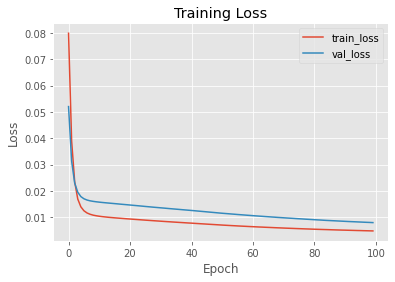

In [75]:
# Implementamos la red empleando Keras
lineal_model = Sequential() # Instancia de modelo API secuencial #(X)
#model.add(Flatten()) # Estiramos los datos en forma de vector como entrada 
#model.add(Dense(128, activation="relu", kernel_initializer='random_uniform', bias_initializer='zeros'))
lineal_model.add(Dense(64, input_shape=(9,),activation="relu")) 
lineal_model.add(Dense(32, activation="relu")) # Añadimos una capa con 32 neuronas y añadimos una función de activacion
lineal_model.add(Dense(1, activation="sigmoid"))  # Construimos nuestro Perceptron
  
# Compilamos y entrenamos el modelo SGD
print("[INFO]: Entrenando red neuronal...")
lineal_model.compile(loss="mean_squared_error", optimizer=SGD(lr, decay=lr_decay/n_epochs))  #(X) optimizer='adam'

# Entrenando la solución
H_lm = lineal_model.fit(x_train, y_train, validation_split=0.2 , epochs=n_epochs, batch_size=batch_size)  #(X) aquí divido los datos de validacion

# Genero la predicción con los datos estandarizados de test
pred_lm = lineal_model.predict(x_test, batch_size=batch_size)


lineal_model.summary()
# Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H_lm.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H_lm.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [76]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_lm_denorm = pred_lm * max_Y
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_lm_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_lm_denorm)
print(f"El error aboluto(mae) de test es: {mae}")

El error cuadrático medio (rmse) de test es: 37.326983332457246
El error aboluto(mae) de test es: 28.51785438939145


In [77]:
#calculamos las perdidas del modelo
test_loss = lineal_model.evaluate(x_test, y_test, verbose=0)
print('test loss: ', test_loss) 

test loss:  0.004507089499384165


##Modelo CNN

#### Preparación de los datos

In [78]:
#Preparo los datos 
X_train_img = imagenes_train
X_test_img = imagenes_test

In [79]:
#Comprobamos que tenemos todas las imagenes de X_Train y X_test cargadas con sus indices correspondientes
print('El número total de imagenes de entrenamiento es: ',len(imagenes_train)) # no son las imagenes correctas
print('El número total de imagenes de testing es: ',len(imagenes_test)) 
print("\n")
print("Las etiquetas de entrenamiento ", y_train.shape)
print("Las etiquetas de testing: ",y_test.shape)

El número total de imagenes de entrenamiento es:  622
El número total de imagenes de testing es:  152


Las etiquetas de entrenamiento  (622,)
Las etiquetas de testing:  (152,)


In [80]:
#mis imagenes son imagenes_train & imagenes_test

In [81]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
# import necesarios

from keras.models import Sequential
from keras.applications import VGG16, ResNet50
from keras.applications.inception_v3 import preprocess_input
from keras import optimizers, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.applications import imagenet_utils
import imageio as io

#inicializo con una semilla
np.random.seed(42)

input_shape = (224, 224, 3)


#X_train = imagenes_train
#X_test = imagenes_test
#y_train = y_train
#y_test = y_test

In [83]:
#Realizamos el resize de las imagenes
input_shape = (224, 224,3)

 #resize train set
X_train_resized = []
for img in x_train:
  X_train_resized.append( cv2.resize(img, (224, 224))/255)
  
X_train_resized = np.array(X_train_resized)
print('X_train_resized: ',X_train_resized.shape)


 #resize test set
X_test_resized = []
for img in x_test:
  X_test_resized.append( cv2.resize(img, (224, 224))/255)
  
X_test_resized = np.array(X_test_resized)
print('X_test_resized: ',X_test_resized.shape)

X_train_resized:  (622, 224, 224)
X_test_resized:  (152, 224, 224)


In [84]:
# normalizamos
new_width = 224
new_height = 224
dim = (new_width, new_height)

# Inicializa una lista para almacenar las imágenes redimensionadas y normalizadas
X_train_resized = []

# Recorre cada imagen en x_train
for img in imagenes_train:
    # Redimensiona la imagen
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    # Convierte la imagen en un array numpy y normaliza los valores de los pixeles
    image_array = np.array(resized, dtype='float32') / 255.0

    # Agrega la imagen redimensionada y normalizada a la lista
    X_train_resized.append(image_array)
    
#Realizamos lo mismo para los datos test

X_test_resized = []

for img in imagenes_test:
    
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    # Convierte la imagen en un array numpy y normaliza los valores de los pixeles
    image_array = np.array(resized, dtype='float32') / 255.0 

    # Agrega la imagen redimensionada y normalizada a la lista
    X_test_resized.append(image_array)
   

In [85]:
 print((X_train_resized))

[array([[[0.9882353 , 1.        , 0.98039216],
        [0.9882353 , 1.        , 0.972549  ],
        [0.9764706 , 0.9882353 , 0.9529412 ],
        ...,
        [0.654902  , 0.59607846, 0.42745098],
        [0.6509804 , 0.5921569 , 0.42352942],
        [0.64705884, 0.5882353 , 0.41960785]],

       [[0.9882353 , 1.        , 0.9764706 ],
        [0.99215686, 1.        , 0.972549  ],
        [0.98039216, 0.99215686, 0.9529412 ],
        ...,
        [0.654902  , 0.59607846, 0.42745098],
        [0.64705884, 0.5882353 , 0.41960785],
        [0.64705884, 0.5882353 , 0.41960785]],

       [[0.9882353 , 1.        , 0.972549  ],
        [0.99607843, 1.        , 0.972549  ],
        [0.98039216, 0.99215686, 0.9529412 ],
        ...,
        [0.6509804 , 0.59607846, 0.42745098],
        [0.64705884, 0.5882353 , 0.41960785],
        [0.64705884, 0.5882353 , 0.41960785]],

       ...,

       [[0.8745098 , 0.85882354, 0.84705883],
        [0.87058824, 0.85490197, 0.84313726],
        [0.85882354, 

In [86]:
print((X_test_resized))

[array([[[0.5921569 , 0.58431375, 0.59607846],
        [0.58431375, 0.5764706 , 0.5882353 ],
        [0.59607846, 0.5803922 , 0.58431375],
        ...,
        [0.5568628 , 0.5254902 , 0.5137255 ],
        [0.5686275 , 0.5372549 , 0.5254902 ],
        [0.57254905, 0.5411765 , 0.5294118 ]],

       [[0.5921569 , 0.58431375, 0.59607846],
        [0.58431375, 0.5764706 , 0.5882353 ],
        [0.59607846, 0.5803922 , 0.58431375],
        ...,
        [0.5568628 , 0.5254902 , 0.5137255 ],
        [0.5686275 , 0.5372549 , 0.5254902 ],
        [0.5686275 , 0.5372549 , 0.5254902 ]],

       [[0.5921569 , 0.58431375, 0.59607846],
        [0.5882353 , 0.5803922 , 0.5921569 ],
        [0.6       , 0.58431375, 0.5882353 ],
        ...,
        [0.5568628 , 0.5254902 , 0.5137255 ],
        [0.5686275 , 0.5372549 , 0.5254902 ],
        [0.5686275 , 0.5372549 , 0.5254902 ]],

       ...,

       [[0.58431375, 0.4509804 , 0.3019608 ],
        [0.58431375, 0.4509804 , 0.3019608 ],
        [0.5882353 , 

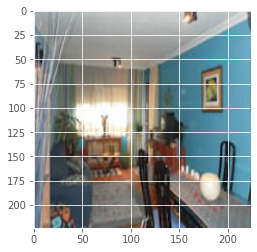

In [87]:
plt.imshow(X_test_resized[17])

#### Comienzo con un Trasfer Learning de VGG16 (mis muestras son poco más de 500) con todas las capas congeladas

In [88]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [89]:
#Congelamos todas las capas de extración de características y modificamos el clasificador
for layer in base_model.layers: 
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output
x = Flatten()(last) #globalMaxPooling #pasar el tensor de caracteristicas a vector
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x) # regularización para reducir el sobreajuste
x = Dense(1, activation='linear', name='predictions')(x) #linear multiplica por x1.0, es la indentity function
model_cnn = Model(base_model.input, x)

# compilamos el modelo
model_cnn.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=['mse'])

# vemos la estructura del modelo
model_cnn.summary()

Capa input_1 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_pool congelada.
Capa block4_conv1 congelada.
Capa block4_conv2 congelada.
Capa block4_conv3 congelada.
Capa block4_pool congelada.
Capa block5_conv1 congelada.
Capa block5_conv2 congelada.
Capa block5_conv3 congelada.
Capa block5_pool congelada.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64

In [90]:
X_train_resized = np.array(X_train_resized)
X_test_resized = np.array(X_test_resized)

Epoch 1/20
4/4 [==============================] - 30s 6s/step - loss: 4556.3545 - mse: 4556.3545 - val_loss: 4152.0981 - val_mse: 4152.0981
Epoch 2/20
4/4 [==============================] - 3s 681ms/step - loss: 2897.5618 - mse: 2897.5618 - val_loss: 4645.0342 - val_mse: 4645.0342
Epoch 3/20
4/4 [==============================] - 3s 683ms/step - loss: 2534.3357 - mse: 2534.3357 - val_loss: 4030.6936 - val_mse: 4030.6936
Epoch 4/20
4/4 [==============================] - 3s 687ms/step - loss: 2466.0576 - mse: 2466.0576 - val_loss: 3858.2480 - val_mse: 3858.2480
Epoch 5/20
4/4 [==============================] - 3s 687ms/step - loss: 2174.3179 - mse: 2174.3179 - val_loss: 4177.5688 - val_mse: 4177.5688
Epoch 6/20
4/4 [==============================] - 3s 697ms/step - loss: 2050.3267 - mse: 2050.3267 - val_loss: 3695.0032 - val_mse: 3695.0032
Epoch 7/20
4/4 [==============================] - 3s 696ms/step - loss: 1952.0144 - mse: 1952.0144 - val_loss: 3625.4563 - val_mse: 3625.4563
Epoch 8/

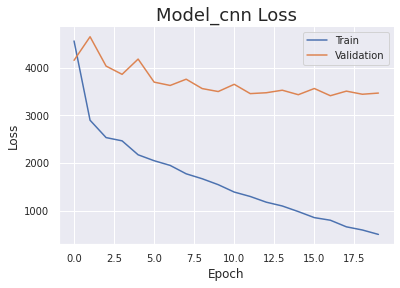

In [91]:
# comenzamos con el entrenamiento
epochs = 20
batch_size = 128

# como entrenariamos normalmente
H_model_cnn = model_cnn.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_split=0.2,
          epochs=epochs)

# Evaluamos el modelo
print("[INFO]: Evaluando red neuronal...")
pred_cnn = model_cnn.predict(X_test_resized, batch_size=batch_size)  #(X)

model_cnn.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_model_cnn.history['loss'], label='Train')
plt.plot(H_model_cnn.history['val_loss'], label='Validation')
plt.title('Model_cnn Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='middle right', fontsize=10)
sns.despine()
plt.show()

In [92]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_cnn_denorm = pred_cnn 
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_cnn_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_cnn_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


El error cuadrático medio (rmse) de test es: 40.64759596713868
El error aboluto(mae) de test es: 27.76640188066583


In [93]:
#calculamos las perdidas del modelo
scores = model_cnn.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])


5/5 [==============================] - 3s 131ms/step - loss: 1652.2269 - mse: 1652.2269
Test loss: 1652.2269287109375


#### Empiezo a descongelar capas

#### voy a aplicar Fine Tuning 

In [94]:
#inicializo con una semilla
np.random.seed(42)
input_shape = (224, 224, 3)

bm_FT = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
bm_FT.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [95]:
# Hago Fine Tuning, Descongelo la ultima capa convolucional
from keras.regularizers import l2

for layer in bm_FT.layers:
  if layer.name == 'block5_conv1': #descongelo el bloque 5
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = bm_FT.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x) 
x = Dropout(0.3)(x)
x = Dense(1, activation='linear', name='predictions')(x)#linear multiplica por x1.0, es la indentity function
model_FT = Model(bm_FT.input, x)

# compilamos el modelo
model_FT.compile(optimizer=Adam(lr=0.001), loss='mse', metrics=['mse'])

# vemos la nueva estructura del modelo
model_FT.summary()

Capa input_2 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_pool congelada.
Capa block4_conv1 congelada.
Capa block4_conv2 congelada.
Capa block4_conv3 congelada.
Capa block4_pool congelada.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  

Epoch 1/20
4/4 [==============================] - 6s 1s/step - loss: 23472.7715 - mse: 23472.7715 - val_loss: 9586.2256 - val_mse: 9586.2256
Epoch 2/20
4/4 [==============================] - 3s 789ms/step - loss: 5617.7534 - mse: 5617.7534 - val_loss: 12404.2998 - val_mse: 12404.2998
Epoch 3/20
4/4 [==============================] - 3s 787ms/step - loss: 5584.7109 - mse: 5584.7109 - val_loss: 7142.9146 - val_mse: 7142.9146
Epoch 4/20
4/4 [==============================] - 3s 786ms/step - loss: 4730.2373 - mse: 4730.2373 - val_loss: 4209.3926 - val_mse: 4209.3926
Epoch 5/20
4/4 [==============================] - 3s 786ms/step - loss: 2897.7434 - mse: 2897.7434 - val_loss: 3976.5002 - val_mse: 3976.5002
Epoch 6/20
4/4 [==============================] - 3s 781ms/step - loss: 2595.2244 - mse: 2595.2244 - val_loss: 4014.1250 - val_mse: 4014.1250
Epoch 7/20
4/4 [==============================] - 3s 783ms/step - loss: 2612.7017 - mse: 2612.7017 - val_loss: 4049.3215 - val_mse: 4049.3215
Epoch

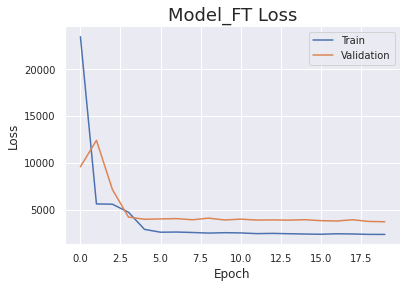

In [96]:
#entreno de nuevo

# como entrenariamos normalmente
H_model_FT = model_FT.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_split=0.2,
          epochs=20)

# Evaluamos el modelo
print("[INFO]: Evaluando red neuronal...")
pred_FT = model_FT.predict(X_test_resized, batch_size=128)  #(X)

model_FT.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_model_FT.history['loss'], label='Train')
plt.plot(H_model_FT.history['val_loss'], label='Validation')
plt.title('Model_FT Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='middle right', fontsize=10)
sns.despine()
plt.show()

In [97]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_FT_denorm = pred_FT
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_FT_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_FT_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


El error cuadrático medio (rmse) de test es: 39.33307608212916
El error aboluto(mae) de test es: 28.112444902721204


In [98]:
# comprobamos el loss en el test set
scores = model_FT.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])



5/5 [==============================] - 1s 124ms/step - loss: 1547.0907 - mse: 1547.0907
Test loss: 1547.0906982421875


##### voy a modificar los parámetros a ver si mejora

##### Pruebo a descongelar el penúltimo bloque a ver si mejora

In [99]:
#inicializo con una semilla
np.random.seed(42)
input_shape = (224, 224, 3)

bm_FT2 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
bm_FT2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [100]:
# Descongelo otra capa convolucional
#from keras.regularizers import l2

for layer in bm_FT2.layers:
  if layer.name == 'block4_conv1': 
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')

# cogemos la penúltima capa del model y le añadimos nuestro clasificador (top_model)
last = bm_FT2.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(1, activation='linear', name='predictions')(x)#linear multiplica por x1.0, es la indentity function
model_FT2 = Model(bm_FT2.input, x)

# compilamos el modelo
model_FT2.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=['mse'])

# vemos la nueva estructura del modelo
model_FT2.summary()

Capa input_3 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_pool congelada.
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 613362.0000 - mse: 613362.0000 - val_loss: 63969.4922 - val_mse: 63969.4922
Epoch 2/20
4/4 [==============================] - 4s 939ms/step - loss: 25809.7949 - mse: 25809.7949 - val_loss: 11337.8525 - val_mse: 11337.8525
Epoch 3/20
4/4 [==============================] - 4s 938ms/step - loss: 9547.9258 - mse: 9547.9258 - val_loss: 9490.7939 - val_mse: 9490.7939
Epoch 4/20
4/4 [==============================] - 4s 937ms/step - loss: 8595.6797 - mse: 8595.6797 - val_loss: 4268.7544 - val_mse: 4268.7544
Epoch 5/20
4/4 [==============================] - 4s 939ms/step - loss: 3394.9487 - mse: 3394.9487 - val_loss: 4982.4121 - val_mse: 4982.4121
Epoch 6/20
4/4 [==============================] - 4s 937ms/step - loss: 3002.3879 - mse: 3002.3879 - val_loss: 4155.4004 - val_mse: 4155.4004
Epoch 7/20
4/4 [==============================] - 4s 932ms/step - loss: 3275.5276 - mse: 3275.5276 - val_loss: 4296.9448 - val_mse: 4296.9448

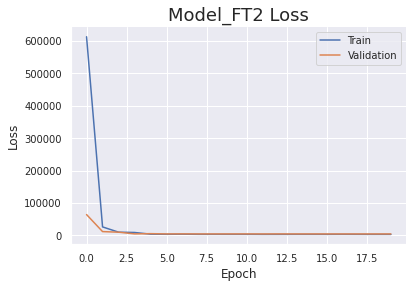

In [101]:
#entreno de nuevo

# como entrenariamos normalmente
H_model_FT2 = model_FT2.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_split=0.2,
          epochs=20) #aumento las epocas a lo bestia a ver si mejora 

# Evaluamos el modelo
print("[INFO]: Evaluando red neuronal...")
pred_FT2 = model_FT2.predict(X_test_resized, batch_size=128)  #(X) 

model_FT2.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_model_FT2.history['loss'], label='Train')
plt.plot(H_model_FT2.history['val_loss'], label='Validation')
plt.title('Model_FT2 Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='middle right', fontsize=10)
sns.despine()
plt.show()

In [102]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_FT2_denorm = pred_FT2
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_FT2_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_FT2_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


El error cuadrático medio (rmse) de test es: 39.51428184577663
El error aboluto(mae) de test es: 28.12439416584216


##### Aquí me empeora el modelo, no voy a seguir descongelando capas, me quedo con el modelo anterior model_FT con solo el último bloque convolucional descongelado. Muestro los mejores resultados que he obtenido hasta ahora.

In [103]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_FT_denorm = pred_FT
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_FT_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_FT_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


El error cuadrático medio (rmse) de test es: 39.33307608212916
El error aboluto(mae) de test es: 28.112444902721204


In [104]:
# comprobamos el loss en el test set
scores = model_FT.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])


5/5 [==============================] - 1s 123ms/step - loss: 1547.0907 - mse: 1547.0907
Test loss: 1547.0906982421875


##### Voy a probar con hyperopt a buscar los parámetros óptimos

##### Mejoro el modelo usando hyperot

In [105]:
# instalamos los paquetes necesarios
!pip install networkx==1.11 # para instala hyperopt correctamente, si no, da errores
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.4 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.18.3 requires networkx>=2.0, but you have networkx 1.11 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
# imports necesarios
import sys
import time
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [107]:
X_train_resized = np.array(X_train_resized)
X_test_resized = np.array(X_test_resized)

In [ ]:
# definimos nuestro espacio de búsqueda
# vamos a variar:
# - el número de filtros en nuestras capas conv
# - el porcentaje de dropout
# - el número de neuronas en la capa dense
space = {
    'learning_rate': hp.choice('lr', [0.05, 0.001, 0.0001]),
    'dropout': hp.uniform('dropout', 0.0, 0.5),
    'neurons_dense': hp.choice('neurons_dense', [256, 512, 1024]), 
}

def	get_callbacks(pars):
  callbacks	= [EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose=0, mode='auto')]
  return callbacks

def mi_cnn(pars):
  print ('Parameters: ', pars)
  model = Sequential()
  # creamos el modelo base
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

  # vamos a entrenar la ultima capa conv para ver si mejoramos los datos
  for layer in base_model.layers:
    if layer.name == 'block5_conv1':
      break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')


# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
  last = base_model.layers[-1].output
  x = Flatten()(last)
  x = Dense(pars["neurons_dense"], activation='relu', name='fc1')(x)
  x = Dropout(pars['dropout'])(x)
  x = Dense(1, activation='sigmoid', name='predictions')(x)
  model = Model(base_model.input, x)

# compilamos el modelo
  model.compile(optimizer=Adam(lr=pars["learning_rate"]), loss='mse', metrics=['mse'])

# vemos la nueva estructura del modelo
  model.summary()

  
  # Entrenamos el modelo
  history = model.fit(X_train_resized, 
                      y_train,
                      batch_size=50,
                      shuffle=True,
                      epochs=8,
                      validation_split=0.2,
                      verbose = 0,
                      callbacks = get_callbacks(pars))

  best_epoch_loss = np.argmin(history.history['val_loss'])
  best_val_loss = np.min(history.history['val_loss'])

  
  print('Epoch {}  - val loss: {}'.format(best_epoch_loss, best_val_loss))
  sys.stdout.flush()
  
  return {'loss': best_val_loss, 'best_epoch': best_epoch_loss, 'eval_time': time.time(), 'status': STATUS_OK, 'model': model, 'history': history}


trials = Trials()
best = fmin(mi_cnn, space, algo=tpe.suggest, max_evals=10, trials=trials)
print(best)

Parameters: 
{'dropout': 0.35717648055593604, 'learning_rate': 0.05, 'neurons_dense': 512}
Capa block5_conv1 congelada.
Model: "model_3"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         

 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      

 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     

 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         

 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     

 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    

 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         

 block3_conv1 (Conv2D)       (None, 56, 56, 256)       295168    

 block3_conv2 (Conv2D)       (None, 56, 56, 256)       590080    

 block3_conv3 (Conv2D)       (None, 56, 56, 256)       590080    

 block3_pool (MaxPooling2D)  (None, 28, 28, 256)       0 

In [ ]:
trials.losses()

In [ ]:
print('El mejor conjunto de hiperarámetros tiene un loss: 0.009382527321577072,, y es:') 
print('\n dropout: 0.17252179449152982, learning_rate: 0.0001, neurons_dense: 256\n' )


#### entreno el modelo bueno con los hiperparámetros que me ha dado el hyperot

In [ ]:
#inicializo con una semilla
np.random.seed(42)
input_shape = (224, 224, 3)

bm_cnn_hp = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
bm_cnn_hp.summary()

In [ ]:
# Hago Fine Tuning, Descongelo la ultima capa convolucional
from keras.regularizers import l2

for layer in bm_cnn_hp.layers:
  if layer.name == 'block5_conv1': #descongelo el bloque 5
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = bm_cnn_hp.layers[-1].output
x = Flatten()(last)
x = Dense(256, activation='relu', name='fc1')(x) 
x = Dropout(0.17)(x)
x = Dense(1, activation='linear', name='predictions')(x)#linear multiplica por x1.0, es la indentity function
model_cnn_hp = Model(bm_cnn_hp.input, x)

# compilamos el modelo
model_cnn_hp.compile(optimizer=Adam(lr=0.0001), loss='mse', metrics=['mse'])

# vemos la nueva estructura del modelo
model_cnn_hp.summary()

In [ ]:
#entreno de nuevo

# como entrenariamos normalmente
H_cnn_hp = model_cnn_hp.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_split=0.2,
          epochs=20)

# Evaluamos el modelo
print("[INFO]: Evaluando red neuronal...")
pred_hp = model_cnn_hp.predict(X_test_resized, batch_size=128)  #(X)

model_cnn_hp.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_cnn_hp.history['loss'], label='Train')
plt.plot(H_cnn_hp.history['val_loss'], label='Validation')
plt.title('Model_FT Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='middle right', fontsize=10)
sns.despine()
plt.show()

In [ ]:
# comprobamos el loss en el test set
scores = model_cnn_hp.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])


In [ ]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_lm_denorm = pred_hp * max_Y
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_lm_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_lm_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


Hyperopt me mejora el mse y el mae. Pero sigo teniendo valores muy altos de error.

## Modelo híbrido

In [ ]:
#model_lm es nuestro modelo numérico
#model_cnn_hp es nuestra red cnn


In [ ]:
!pip install -q keras

In [ ]:
!pip install imutils

In [ ]:
# importar los paquetes necesarios
import tensorflow as tf
from tensorflow import keras
from keras.layers import concatenate
from keras.layers import Input, concatenate
from keras.models import Model
import cv2 
import imutils
#from pyimagesearch import datasets
#from pyimagesearch import models
import argparse
import locale
import os

In [ ]:
# definir nuestra red MLP (modelo lineal)
np.random.seed(42) #semilla de inicio

	# define our MLP network
def create_mlp(input_shape_mlp, regress=False):
    inputs = Input(shape=(9,))
    x = Dense(64, activation='relu', bias_initializer='zeros')(inputs)
    x = Dense(32, activation='relu')(x)
    if regress:
        outputs = Dense(1, activation='sigmoid')(x)
    else:
        outputs = x
    modelF_mlp = Model(inputs, outputs)
    return modelF_mlp

def create_cnn(input_shape_cnn, regress=False):
    inputs = Input(shape=(224, 224, 3))
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    
    for layer in base_model.layers:
      layer.trainable = False
    # cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
    last = base_model.layers[-1].output
    x = Flatten()(last)
    x = Dense(120, activation='relu', name='fc1')(x)
    x = Dropout(0.29)(x)
    if regress:
        outputs = Dense(1, activation='sigmoid', name='predictions')(x)
   
    model_Fcnn = Model(base_model.inputs, x)
    return model_Fcnn



In [ ]:
#remember de mis datos
#x_train, train normalizado
#x_test, test normalizado

#y_train, etiquetas norm
#y_test, etiquetas norm

#X_train_resized, imagenes norm
#X_test_resized, imagenes norm

In [ ]:
X_train_resized = np.array(X_train_resized)
X_test_resized = np.array(X_test_resized)

In [ ]:
# Crear el modelo MLP
input_mlp = Input(shape=(9,))
mlp_model = create_mlp(input_mlp.shape[1] , regress=False)

# Crear el modelo CNN
input_cnn = Input(shape=(224, 224, 3))  #input_shape=(224,244,3) 
cnn_model = create_cnn(input_cnn, regress=False)

# Concatenate inputs
concat_inputus= concatenate([mlp_model.output, cnn_model.output])

# las capas finales de la red son las salidas de la mlp y la cnn
x = Dense(4, activation="relu")(concat_inputus)
x = Dense(1, activation="linear")(x)

# Creación de un modelo final
model_hib= Model(inputs=[input_mlp, input_cnn], outputs=x)


In [ ]:
#optimizador
opt = Adam(lr=1e-3, decay=1e-3 / 20)

# Compilación del modelo
model_hib.compile(loss='mean_square_error', optimizer=opt)

# train the model
print("[INFO] training model...")
model_hib.fit(
	x=[x_train, X_train_resized], y=y_train,
	validation_split=0.2,
	epochs=20, batch_size=128)

# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model_hib.predict([x_test, X_test_resized])

diff = preds.flatten() - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np. abs(diff)
print(absPercentDiff.mean())

model_hib.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_cnn_hp.history['loss'], label='Train')
plt.plot(H_cnn_hp.history['val_loss'], label='Validation')
plt.title('Model_FT Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='middle right', fontsize=10)
sns.despine()
plt.show()

In [ ]:
X_train.max()

In [ ]:
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
max_Y = X_train.max()
preds_norm=preds.flatten()*max_Y

diff = list(flatten(preds_norm)) - (y_test*max_Y)
absPercentDiff = np. abs(diff)
print("El error medio en EUR",absPercentDiff.mean())

#compute the mean and standard deviation of the absolute percentage difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)